In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from metro_dataset import MetroDataset, Line
from pytorch_lightning import Trainer
from metro_model import MetroModel
from networkx.drawing.layout import *
from icecream import ic
import numpy as np
import pandas as pd
import torch
torch.manual_seed(0)

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\momepy\coins.py:15: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (

# Cycles

In [2]:
line_1 = Line(nodes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], weight=0.3)
line_2 = Line(nodes=[10, 11, 12], weight=0.3)
line_3 = Line(nodes=[14, 15, 16], weight=0.3)
line_4 = Line(nodes=[21,23,14,4], weight=0.4)

# Dataset

In [3]:
dataset = MetroDataset([line_1, line_2, line_3, line_4], init_nb=20)
num_nodes = dataset.cg.num_nodes()

In [4]:
# G  = dataset.cg.graph
# pos = {node: get_pos(x['station']) for node, x in G.nodes(data=True)}
# labels = nx.get_node_attributes(G, "station")
# nx.draw(G, pos, with_labels=True)

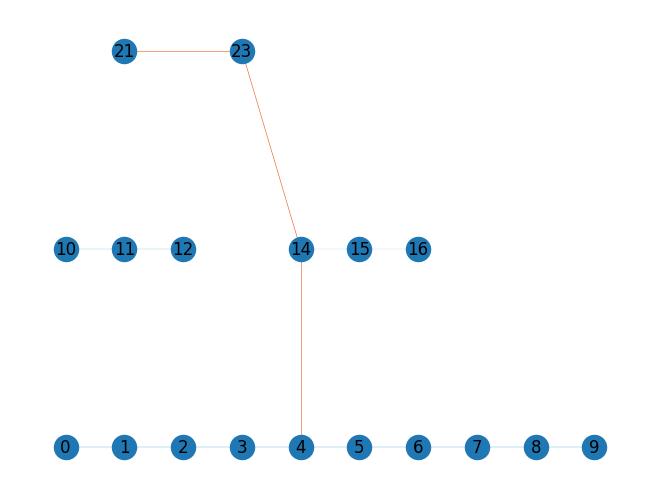

In [5]:
dataset.cg.visualize(dataset.cg.graph, 10)

In [6]:
dataset.cg.altair_graph(dataset.cg.graph, 10)

c:\Users\simon\Projets\CountryTrends\.conda\lib\site-packages\momepy\utils.py:430: UserWarning: Approach is not set. Defaulting to 'primal'.
  warnings.warn("Approach is not set. Defaulting to 'primal'.")


alt.LayerChart(...)

# Model

In [ ]:
A_init = torch.tensor(dataset.cg.adjacency_matrix(), requires_grad=True).float()

In [ ]:
model = MetroModel(embedding_size=8, num_nodes=num_nodes, neighbor_nb=1, input_size=1, gsl_mode="matrix") # , 

# Training

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=8)
trainer = Trainer(max_epochs=50)
trainer.fit(model, train_loader)

# Evaluation

In [ ]:
A = model.graph_matrix_learning().detach().numpy()
# A = model.linear.weight.detach().numpy()
# A = A / A.sum(axis=0)
A = np.array(A)

In [ ]:
learned_graph = nx.from_numpy_array(A, nx.DiGraph)
dataset.cg.visualize(learned_graph, 10)

In [ ]:
# learned_graph = nx.from_numpy_array(A, nx.DiGraph)
# labels = {k: v for k, v in enumerate(dataset.dataframes[0].columns)}
# learned_graph = nx.relabel_nodes(learned_graph, labels)
# weight=nx.get_edge_attributes(learned_graph,'weight')
# stations = nx.get_node_attributes(G, "station")
# sides = nx.get_node_attributes(G, "side")
# correctness = ['green' if e in G.edges() else 'red' for e in learned_graph.edges()]

# nx.draw(learned_graph, pos, labels=labels, with_labels=True, width=list(weight.values()), edge_color=correctness)

In [ ]:
# contracted_learned_graph = dataset.cg.contract(learned_graph)
# pos = nx.nx_agraph.graphviz_layout(contracted_G, prog="twopi", root=0)
# labels = nx.get_node_attributes(contracted_G, "station")
# nx.draw(contracted_learned_graph, contracted_pos, labels=contracted_labels, with_labels=True)

In [ ]:
# TODO: Essayer avec les embeddings
# TODO: Essayer avec un graph bruité en entrée
# TODO: Essayer avec des data bruitées
# TODO: Essayer avec différents réseaux (de métro)
# TODO: Essayer avec le graphe contracté 

# Altair

In [ ]:
G = nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(1,2)
G.add_edge(2,3)

pos = {
    1: (0,1),
    2: (0,2),
    3: (1,3),
}

edge_geometry = {(a,b): LineString([pos[a], pos[b]]) for a,b in G.edges}
edge_id = {(1,2): 1, (2,3): 2}
nx.set_edge_attributes(G, edge_geometry, "geometry")
nx.set_edge_attributes(G, edge_id, "edge_id")
G = nx.relabel_nodes(G, pos)

In [ ]:
gdf = momepy.nx_to_gdf(G)

In [ ]:
gdf[1]

In [ ]:
lines = alt.Chart(gdf[1]).mark_geoshape(
    filled=False,
    strokeWidth=10
).encode(
    alt.Color(
        'edge_id:N',
        # scale=line_scale
    )
)
lines